# Breadth-First Search with Neptune Analytics

This notebook demonstrates how to use AWS Neptune Analytics to offload Breadth-First Search (BFS) algorithm computations from a local cluster. We'll create several graph examples and run BFS on them using both standard NetworkX and Neptune Analytics as a backend.

## Setup and Imports

First, let's import the necessary libraries and set up logging.

In [1]:
import networkx as nx
from nx_neptune import NeptuneGraph
import logging
import os
import matplotlib.pyplot as plt

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Ignore cache warnings
nx.config.warnings_to_ignore.add("cache")

## Check for Neptune Analytics Graph ID

We need to ensure that the GRAPH_ID environment variable is set. You can also set it directly in this notebook.

In [2]:
# Read and load graphId from environment variable
graph_id = os.getenv('GRAPH_ID')

# If not set, you can set it here
if not graph_id:
    # Uncomment and set your Graph ID
    # %env GRAPH_ID=your-neptune-analytics-graph-id
    # graph_id = os.getenv('GRAPH_ID')
    print("Warning: Environment Variable GRAPH_ID is not defined")
    print("You can set it using: %env GRAPH_ID=your-neptune-analytics-graph-id")
else:
    print(f"Using Neptune Analytics Graph ID: {graph_id}")

# Define the backend we'll use
BACKEND = "neptune"
print(f"Using backend={BACKEND}")

Using Neptune Analytics Graph ID: g-r4g1koz7v9
Using backend=neptune


## Clear the Neptune Analytics Graph

Let's start with a clean slate by clearing any existing data in the Neptune Analytics graph.

In [4]:
# Clear the Neptune Analytics graph
g = nx.Graph()
na_graph = NeptuneGraph(graph=g)
na_graph.clear_graph()
print("Neptune Analytics graph cleared successfully")

Neptune Analytics graph cleared successfully


## Example 1: Named Nodes in a Directed Graph

Let's create a simple directed graph with named nodes and run BFS on it.

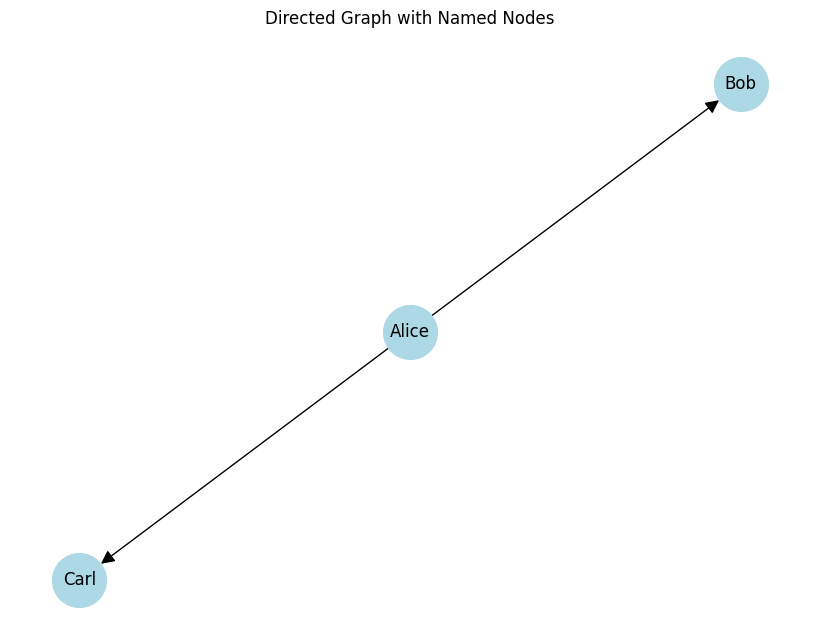

In [5]:
# Create a directed graph with named nodes
G = nx.DiGraph()
G.add_node("Alice")
G.add_node("Bob")
G.add_node("Carl")
G.add_edge("Alice", "Bob")
G.add_edge("Alice", "Carl")

# Visualize the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', 
        node_size=1500, font_size=12, arrows=True, arrowsize=20)
plt.title("Directed Graph with Named Nodes")
plt.show()

### BFS from Alice

Let's run BFS starting from Alice and see what edges we get.

In [6]:
# Run BFS from Alice using Neptune Analytics
try:
    print('Edges from BFS search from source="Alice": ')
    r = list(nx.bfs_edges(G, "Alice", backend=BACKEND))
    print(r)  # Expected: [("Alice", "Bob"), ("Alice", "Carl")]
    
    # Verify the results
    assert isinstance(r, list)
    assert len(r) == 2
    assert ("Alice", "Bob") in r
    assert ("Alice", "Carl") in r
    print("✓ Verification passed")
except Exception as e:
    print(f"Error: {e}")
    print("Make sure GRAPH_ID is set and your AWS credentials are configured correctly.")

Edges from BFS search from source="Alice": 
[('Alice', 'Bob'), ('Alice', 'Carl')]
✓ Verification passed


### BFS from Bob with Reverse Direction

Now let's run BFS starting from Bob, but in the reverse direction of the edges, with a depth limit of 1.

In [7]:
# Run BFS from Bob in reverse direction with depth limit 1
try:
    print('Edges from BFS search from source="Bob"; reverse=True; depth_limit=1: ')
    r = list(nx.bfs_edges(G, "Bob", backend=BACKEND, reverse=True, depth_limit=1))
    print(r)  # Expected: [("Bob", "Alice")]
    
    # Verify the results
    assert isinstance(r, list)
    assert len(r) == 1
    assert ("Bob", "Alice") in r
    print("✓ Verification passed")
except Exception as e:
    print(f"Error: {e}")
    print("Make sure GRAPH_ID is set and your AWS credentials are configured correctly.")

Edges from BFS search from source="Bob"; reverse=True; depth_limit=1: 
[('Bob', 'Alice')]
✓ Verification passed


## Example 2: Path Graph with 3 Nodes

Let's create a path graph with 3 nodes and run BFS on it.

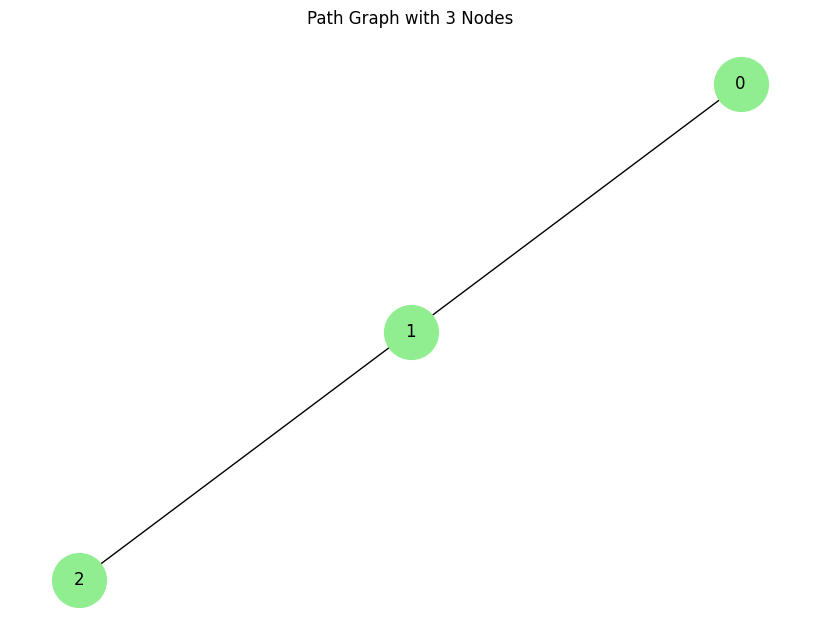

In [8]:
# Create a path graph with 3 nodes
# 0 -- 1 -- 2
G = nx.path_graph(3)

# Visualize the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightgreen', 
        node_size=1500, font_size=12)
plt.title("Path Graph with 3 Nodes")
plt.show()

### BFS from Node 0

Let's run BFS starting from node 0.

In [9]:
# Run BFS from node 0
try:
    print('Edges from BFS search from source=0: ')
    r = list(nx.bfs_edges(G, 0, backend=BACKEND))
    print(r)  # Expected: [(0, 1), (1, 2)]
    
    # Verify the results
    assert isinstance(r, list)
    assert len(r) == 2
    assert (0, 1) in r
    assert (1, 2) in r
    print("✓ Verification passed")
except Exception as e:
    print(f"Error: {e}")
    print("Make sure GRAPH_ID is set and your AWS credentials are configured correctly.")

Edges from BFS search from source=0: 
[(0, 1), (1, 2)]
✓ Verification passed


### BFS from Node 0 with Depth Limit

Let's run BFS starting from node 0 with a depth limit of 1.

In [10]:
# Run BFS from node 0 with depth limit 1
try:
    print('Edges from BFS search from source=0; depth_limit=1: ')
    r = list(nx.bfs_edges(G, source=0, depth_limit=1, backend=BACKEND))
    print(r)  # Expected: [(0, 1)]
    
    # Verify the results
    assert r == [(0, 1)]
    print("✓ Verification passed")
except Exception as e:
    print(f"Error: {e}")
    print("Make sure GRAPH_ID is set and your AWS credentials are configured correctly.")

Edges from BFS search from source=0; depth_limit=1: 
[(0, 1)]
✓ Verification passed


### BFS from Node 1

Let's run BFS starting from node 1.

In [11]:
# Run BFS from node 1
try:
    print('Edges from BFS search from source=1: ')
    r = list(nx.bfs_edges(G, source=1, backend=BACKEND))
    print(r)  # Expected: [(1, 0), (1, 2)]
    
    # Verify the results
    assert len(r) == 2
    assert (1, 0) in r
    assert (1, 2) in r
    print("✓ Verification passed")
except Exception as e:
    print(f"Error: {e}")
    print("Make sure GRAPH_ID is set and your AWS credentials are configured correctly.")

Edges from BFS search from source=1: 
[(1, 0), (1, 2)]
✓ Verification passed


### BFS from Node 1 with Reverse Direction

Let's run BFS starting from node 1 with reverse=True.

In [12]:
# Run BFS from node 1 with reverse=True
try:
    print('Edges from BFS search from source=1; reversed=True: ')
    r = list(nx.bfs_edges(G, source=1, reverse=True, backend=BACKEND))
    print(r)  # Expected: [(1, 0), (1, 2)]
    
    # Verify the results
    assert isinstance(r, list)
    assert len(r) == 2
    assert (1, 0) in r
    assert (1, 2) in r
    print("✓ Verification passed")
except Exception as e:
    print(f"Error: {e}")
    print("Make sure GRAPH_ID is set and your AWS credentials are configured correctly.")

Edges from BFS search from source=1; reversed=True: 
[(1, 0), (1, 2)]
✓ Verification passed


## Example 3: Larger Path Graph

Let's create a larger path graph with 12 nodes and run BFS on it.

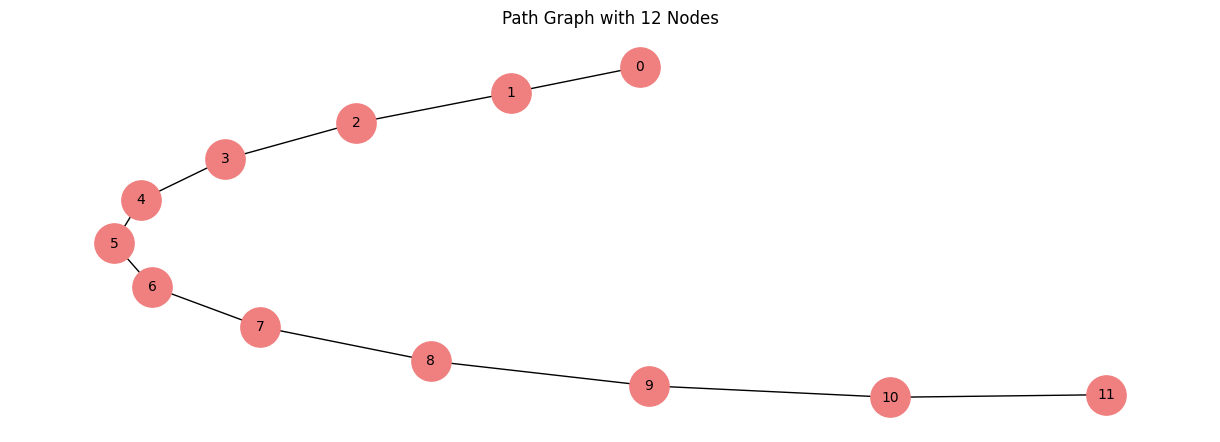

In [13]:
# Create a path graph with 12 nodes
# 0 -- 1 -- 2 -- ... -- 11
G = nx.path_graph(12)

# Visualize the graph
plt.figure(figsize=(12, 4))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightcoral', 
        node_size=800, font_size=10)
plt.title("Path Graph with 12 Nodes")
plt.show()

### BFS from Node 6

Let's run BFS starting from node 6 in the middle of the path.

In [14]:
# Run BFS from node 6
try:
    print('Edges from BFS search from source=6: ')
    r = list(nx.bfs_edges(G, source=6, backend=BACKEND))
    print(r)  # Expected: [(6, 5), (6, 7), (5, 4), ...]
    
    # Verify the results
    assert isinstance(r, list)
    assert len(r) == 11
    
    # Check edges going up
    for i in [6, 7, 8, 9, 10]:
        assert (i, i+1) in r, f"Edge ({i}, {i+1}) not found"
    
    # Check edges going down
    for i in [6, 5, 4, 3, 2, 1]:
        assert (i, i-1) in r, f"Edge ({i}, {i-1}) not found"
        
    print("✓ Verification passed")
except Exception as e:
    print(f"Error: {e}")
    print("Make sure GRAPH_ID is set and your AWS credentials are configured correctly.")

Edges from BFS search from source=6: 
[(6, 5), (9, 10), (2, 1), (6, 7), (7, 8), (1, 0), (5, 4), (10, 11), (8, 9), (4, 3), (3, 2)]
✓ Verification passed


## Visualizing BFS Traversal

Let's visualize the BFS traversal on our path graph with 12 nodes.

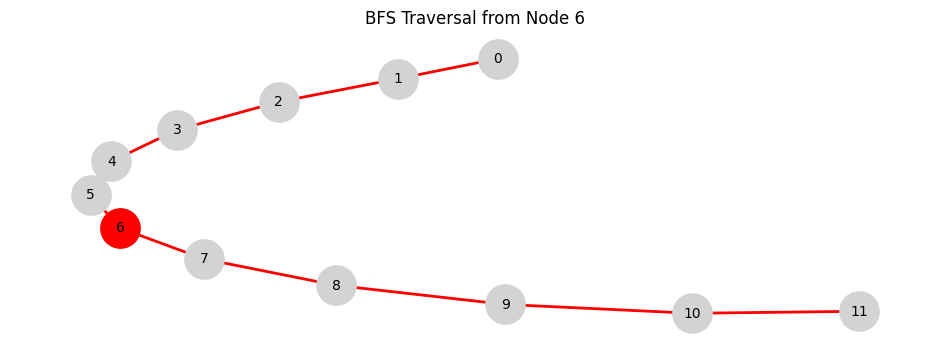

In [15]:
def visualize_bfs_traversal(G, source, edges):
    plt.figure(figsize=(12, 4))
    pos = nx.spring_layout(G, seed=42)
    
    # Draw the graph
    nx.draw_networkx_nodes(G, pos, node_color='lightgray', node_size=800)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
    
    # Highlight the source node
    nx.draw_networkx_nodes(G, pos, nodelist=[source], node_color='red', node_size=800)
    
    # Highlight the BFS edges
    nx.draw_networkx_edges(G, pos, edgelist=edges, width=2.0, edge_color='red')
    
    # Add labels
    nx.draw_networkx_labels(G, pos, font_size=10)
    
    plt.title(f"BFS Traversal from Node {source}")
    plt.axis('off')
    plt.show()

# Visualize BFS traversal from node 6
try:
    bfs_edges = list(nx.bfs_edges(G, source=6, backend=BACKEND))
    visualize_bfs_traversal(G, 6, bfs_edges)
except Exception as e:
    print(f"Error: {e}")
    print("Make sure GRAPH_ID is set and your AWS credentials are configured correctly.")

## Conclusion

This notebook demonstrated how to use the Breadth-First Search algorithm with Neptune Analytics as a backend. We've seen that:

1. BFS can be run on different types of graphs (directed and undirected)
2. We can control the traversal with parameters like `reverse` and `depth_limit`
3. Visualizing the BFS traversal helps understand the algorithm's behavior

Using Neptune Analytics as a backend allows you to offload the computation to AWS, which can be beneficial for larger graphs where local computation would be resource-intensive.